### About Audio Features

| Column   |      Value Type      |  Value Description |
|----------|:--------------------:|-------------------:|
| id | - | The Spotify ID for the track. |
| name | string | Name of the track. |
| artist | string | Artist who plays the track. |
| artist_id | - | The Spotify ID for the artist. |
| album | string | The album where the track is on. |
| album_id | - | The Spotify ID for the album. | 
| popularity | int | The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.|
| duration_ms | int | The duration of the track in milliseconds. |
| key | int | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| mode | int | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| acousticness | float | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability | float | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy | float | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | float | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness | float | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | float | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| speechiness | float | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| valence | float | 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| tempo | float | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |


### Imports

In [1]:
from diversify.session import SpotifySession
import pandas as pd
import missingno as msno
%matplotlib inline

In [ ]:
def get_genres(artists_id, session):
    response = spfy.artist(artists_id)
    if len(response['genres']) == 0:
      return []
    return response['genres']

### Users

In [2]:
# Users to login
#my_user = '12144777067' # my account
my_user = 'rm2azb4jnd15soiqhl5qc9eya' # my other account

# Users to collect songs
#user = 'belzedu' # Edu
#user = 'ilikemiojo' # Maurício
#user = 'ebetcel' # Betcel
#user = 'andreaskeete' # Bigod
#user = 'vi_liraa' # Vini
user = 'brttrexpeita' # brTT
#user = '12152882067' # Élvis
#user = '12144777067' # my account
#user = 'rm2azb4jnd15soiqhl5qc9eya' # my other account

### Collecting tracks for the train dataset

In [3]:
session = SpotifySession(my_user)



         User authentication requires interaction with your
         web browser. Once you enter your credentials and
         give authorization, you will be redirected to
         a url.  Paste that url you were directed to to
         complete the authorization.

     
Opened https://accounts.spotify.com/authorize?client_id=f4bd9bcb87724721ab5b0a9667f1ae52&response_type=code&redirect_uri=https%3A%2F%2Fedujtm.github.io%2Fdiversify%2Fredirect&scope=playlist-modify-private+user-library-read in your browser


Enter the the code pattern you were given: AQDKtyxLY8kUCjD82W2INByc8Q1SZXgQ0bO5Ru3HA-k6JflsC0EnUhvIy9TKJ1MqmuSGTJ0QbX3fxbCvScNDB9s6j80FnBx4H-Q1xp8BsxcZ1GfpsFppf0QZFYLOpVCq-2bwLTVhb6lpNDWcKoS2V1inQQOsYMDu5R09XiA_8OKsJw789Tay1B12BZ3YBVtCrpv3YoAfrldTG7g8BPgoiR30iGYlamUQqmwUGfwa6vGNOmGKkn7d4tK2mvcxL3tqY3Bwsa0QspAFnZ6XpWVV




- Collecting tracks

In [6]:
songs = session.get_favorite_songs()
df_songs = pd.DataFrame(songs)

print(df_songs.shape)
df_songs.head(3)

(6500, 8)


,album,album_id,artist,artist_id,duration_ms,id,name,popularity
0,Made In Studio 2,1VE4gyyX0wEGJEnzZ4bvbM,Márcia Fellipe,3OxZ4asD88P1lJJmLcXz4K,137826,3mf4l3O9xn8JukaUETnZFt,Chá De Sofrimento,37
1,Made In Studio 2,1VE4gyyX0wEGJEnzZ4bvbM,Márcia Fellipe,3OxZ4asD88P1lJJmLcXz4K,145883,48cryfhSXQGrWyhnmXEOEg,Nota 1.000,37
2,Deixa,7wj45LWz6uIcyBd8iqdlZ5,Bruna Magalhães,108y6vREhgAIvgvm1Cq54p,207209,0m52ru9yO561lgoMHyclcC,Deixa,1


- Collecting features for the tracks above

In [5]:
features = session.get_favorite_songs(features = True)
df_features = pd.DataFrame(features)

print(df_features.shape)
df_features.head(3)

(6500, 12)


,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.411,0.666,0.859,3mf4l3O9xn8JukaUETnZFt,0.000000,8,0.3140,-3.836,1,0.0304,156.990,0.933
1,0.564,0.707,0.851,48cryfhSXQGrWyhnmXEOEg,0.000094,7,0.3300,-5.008,0,0.0322,153.929,0.871
2,0.801,0.299,0.159,0m52ru9yO561lgoMHyclcC,0.000000,11,0.0611,-16.540,0,0.0357,183.227,0.180


- Joining the datasets

In [31]:
songs_features = df_songs.merge(df_features, how='inner', on='id')

print(songs_features.shape)
songs_features.head(3)

(6500, 19)


,album,album_id,artist,artist_id,duration_ms,id,name,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Made In Studio 2,1VE4gyyX0wEGJEnzZ4bvbM,Márcia Fellipe,3OxZ4asD88P1lJJmLcXz4K,137826,3mf4l3O9xn8JukaUETnZFt,Chá De Sofrimento,37,0.411,0.666,0.859,0.000000,8,0.3140,-3.836,1,0.0304,156.990,0.933
1,Made In Studio 2,1VE4gyyX0wEGJEnzZ4bvbM,Márcia Fellipe,3OxZ4asD88P1lJJmLcXz4K,145883,48cryfhSXQGrWyhnmXEOEg,Nota 1.000,38,0.564,0.707,0.851,0.000094,7,0.3300,-5.008,0,0.0322,153.929,0.871
2,Deixa,7wj45LWz6uIcyBd8iqdlZ5,Bruna Magalhães,108y6vREhgAIvgvm1Cq54p,207209,0m52ru9yO561lgoMHyclcC,Deixa,0,0.801,0.299,0.159,0.000000,11,0.0611,-16.540,0,0.0357,183.227,0.180


- Checking data integrity

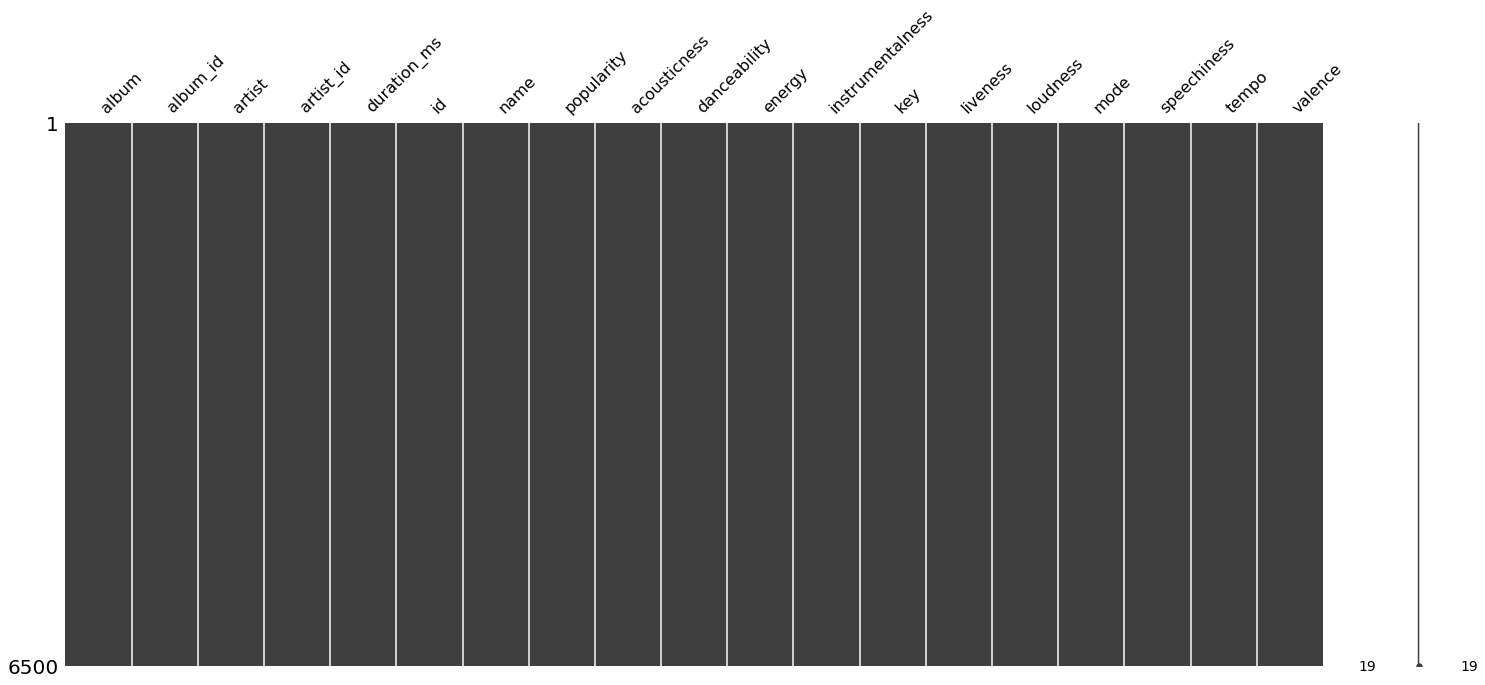

In [39]:
msno.matrix(songs_features)

### Collecting tracks from the users playlists

- Collecting tracks and features

In [4]:
playlists_songs = session.get_user_playlists(user)
playlists_features = session.get_user_playlists(user, features=True)

print("Songs")
display(playlists_songs[0])

print("Features")
display(playlists_features[0])

Songs


('canto',
 [{'name': 'Radioactive',
   'id': '62yJjFtgkhUrXktIoSjgP2',
   'popularity': 79,
   'duration_ms': 186813,
   'album': 'Night Visions',
   'album_id': '6nxDQi0FeEwccEPJeNySoS',
   'artist': 'Imagine Dragons',
   'artist_id': '53XhwfbYqKCa1cC15pYq2q'},
  {'name': 'I Kissed A Girl',
   'id': '5gD1OfCiygqxjjOxiaEKUe',
   'popularity': 46,
   'duration_ms': 180946,
   'album': 'I Kissed A Girl',
   'album_id': '6puf6DIqPoNJGxpr3oCR5s',
   'artist': 'Katy Perry',
   'artist_id': '6jJ0s89eD6GaHleKKya26X'},
  {'name': 'Roar',
   'id': '6F5c58TMEs1byxUstkzVeM',
   'popularity': 79,
   'duration_ms': 223546,
   'album': 'PRISM (Deluxe)',
   'album_id': '5MQBzs5YlZlE28mD9yUItn',
   'artist': 'Katy Perry',
   'artist_id': '6jJ0s89eD6GaHleKKya26X'},
  {'name': 'How Far I\'ll Go - From "Moana"',
   'id': '5EbX5xL3O2xT8FxCpYzgUO',
   'popularity': 72,
   'duration_ms': 175517,
   'album': 'How Far I\'ll Go (From "Moana")',
   'album_id': '2ho9l951XwxpBFEEjubOUx',
   'artist': 'Alessia Car

Features


('canto',
 [{'id': '62yJjFtgkhUrXktIoSjgP2',
   'speechiness': 0.0634,
   'valence': 0.195,
   'mode': 1,
   'liveness': 0.671,
   'key': 9,
   'danceability': 0.457,
   'loudness': -3.699,
   'acousticness': 0.114,
   'instrumentalness': 0.000101,
   'energy': 0.793,
   'tempo': 136.382},
  {'id': '5gD1OfCiygqxjjOxiaEKUe',
   'speechiness': 0.0932,
   'valence': 0.757,
   'mode': 0,
   'liveness': 0.0714,
   'key': 9,
   'danceability': 0.681,
   'loudness': -3.23,
   'acousticness': 0.00218,
   'instrumentalness': 0,
   'energy': 0.753,
   'tempo': 129.976},
  {'id': '6F5c58TMEs1byxUstkzVeM',
   'speechiness': 0.0418,
   'valence': 0.455,
   'mode': 0,
   'liveness': 0.354,
   'key': 7,
   'danceability': 0.554,
   'loudness': -4.821,
   'acousticness': 0.00487,
   'instrumentalness': 6.6e-06,
   'energy': 0.772,
   'tempo': 179.984},
  {'id': '5EbX5xL3O2xT8FxCpYzgUO',
   'speechiness': 0.354,
   'valence': 0.147,
   'mode': 1,
   'liveness': 0.0673,
   'key': 9,
   'danceability': 0

- Retriving only the songs from the dictionaries

Songs

In [8]:
user_songs = [song for playlist, songs in playlists_songs for song in songs]
df_user_songs = pd.DataFrame(user_songs).drop_duplicates(subset='id')

print(df_user_songs.shape)
df_user_songs.head(3)

(442, 8)


,album,album_id,artist,artist_id,duration_ms,id,name,popularity
0,Night Visions,6nxDQi0FeEwccEPJeNySoS,Imagine Dragons,53XhwfbYqKCa1cC15pYq2q,186813,62yJjFtgkhUrXktIoSjgP2,Radioactive,79
1,I Kissed A Girl,6puf6DIqPoNJGxpr3oCR5s,Katy Perry,6jJ0s89eD6GaHleKKya26X,180946,5gD1OfCiygqxjjOxiaEKUe,I Kissed A Girl,46
2,PRISM (Deluxe),5MQBzs5YlZlE28mD9yUItn,Katy Perry,6jJ0s89eD6GaHleKKya26X,223546,6F5c58TMEs1byxUstkzVeM,Roar,79


Features

In [25]:
user_features = [song for playlist, songs in playlists_features for song in songs]
df_user_features = pd.DataFrame(user_features).drop_duplicates(subset='id')

print(df_user_features.shape)
df_user_features.head(3)

(442, 12)


,id,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,62yJjFtgkhUrXktIoSjgP2,0.0634,0.195,1,0.6710,9,0.457,-3.699,0.11400,0.000101,0.793,136.382
1,5gD1OfCiygqxjjOxiaEKUe,0.0932,0.757,0,0.0714,9,0.681,-3.230,0.00218,0.000000,0.753,129.976
2,6F5c58TMEs1byxUstkzVeM,0.0418,0.455,0,0.3540,7,0.554,-4.821,0.00487,0.000007,0.772,179.984


- Joining the datasets from above

In [26]:
user_songs_features = df_user_songs.merge(df_user_features, how='inner', on='id')

print(user_songs_features.shape)
user_songs_features.head(3)

(442, 19)


,name,id,popularity,duration_ms,album,album_id,artist,artist_id,speechiness,valence,mode,liveness,key,danceability,loudness,acousticness,instrumentalness,energy,tempo
0,Radioactive,62yJjFtgkhUrXktIoSjgP2,79,186813,Night Visions,6nxDQi0FeEwccEPJeNySoS,Imagine Dragons,53XhwfbYqKCa1cC15pYq2q,0.0634,0.195,1,0.6710,9,0.457,-3.699,0.11400,0.000101,0.793,136.382
1,I Kissed A Girl,5gD1OfCiygqxjjOxiaEKUe,46,180946,I Kissed A Girl,6puf6DIqPoNJGxpr3oCR5s,Katy Perry,6jJ0s89eD6GaHleKKya26X,0.0932,0.757,0,0.0714,9,0.681,-3.230,0.00218,0.000000,0.753,129.976
2,Roar,6F5c58TMEs1byxUstkzVeM,79,223546,PRISM (Deluxe),5MQBzs5YlZlE28mD9yUItn,Katy Perry,6jJ0s89eD6GaHleKKya26X,0.0418,0.455,0,0.3540,7,0.554,-4.821,0.00487,0.000007,0.772,179.984


- Checking users data integrity

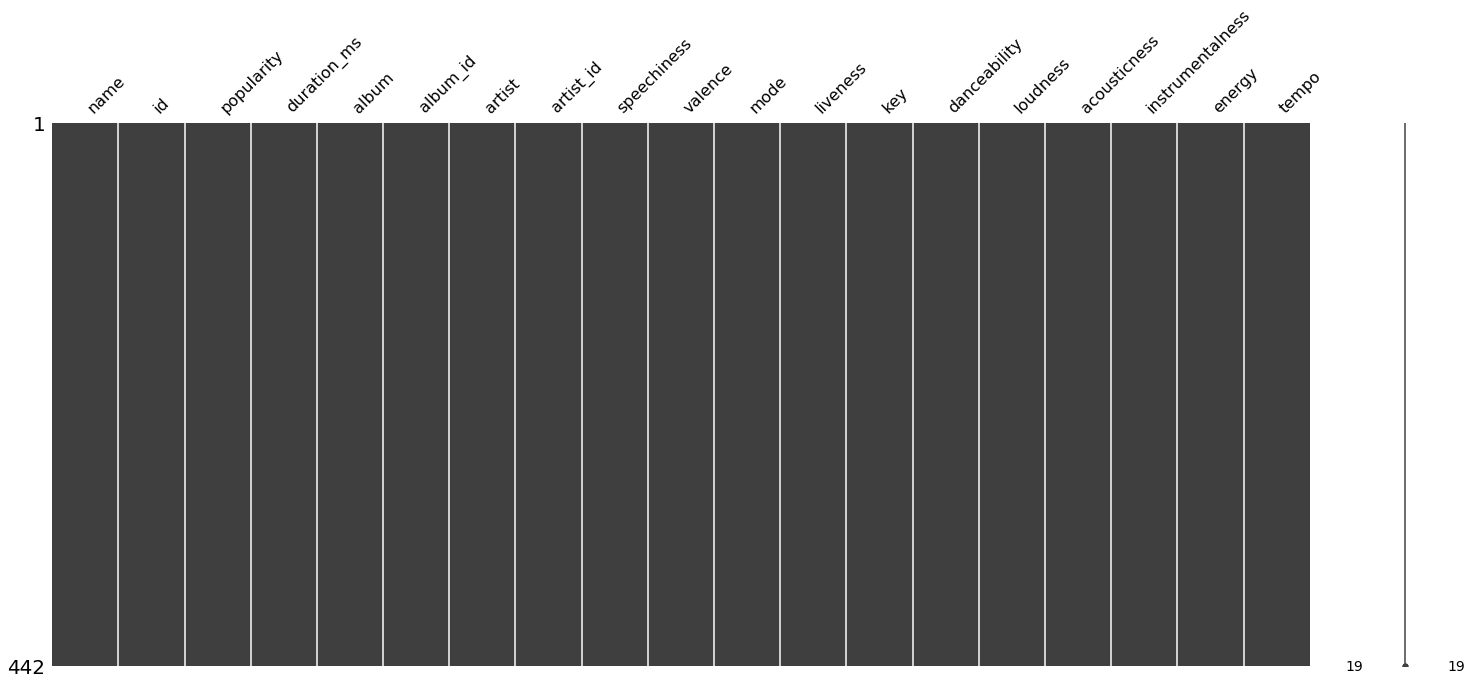

In [27]:
msno.matrix(user_songs_features)

### Exporting to csv

- Train dataset (clustering)

In [9]:
songs_features.to_csv('datasets/songs_to_cluster.csv', index=False)

- Users dataset

In [28]:
user_songs_features.to_csv('datasets/user_songs/{}_songs.csv'.format(user), index=False)

### Future works

- Pass list of users to collect songs